# Transfermarkt Big 5 Exploring Relationships

### Content List
#### 1. Import Visualization Libaraies and Data
#### 2. Clean Data
#### 3. Exploring Relationships

### 1. Import Visualization Libaries and Data

In [1]:
#Import Viz libaraies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
#Remove scientific notation
pd.options.display.float_format='{:.4f}'.format

In [2]:
%matplotlib inline

In [3]:
#Create import path
path = r'C:\Users\Utilizador\OneDrive\Documents\CareerFoundry - Data Analyst\Data Immersion\A6\24-03-2024 TransferMarkt'

In [4]:
#Import Data
big5 = pd.read_pickle (os.path.join (path,'02 Data','Prepared Data', 'wrangled_big5.pkl'))

### 2. Clean Data

In [5]:
big5.shape

(519905, 24)

In [6]:
big5.head()

,player_id,player_name,date_of_birth,age,country_of_citizenship,country_of_citizen#,position,position#,sub_position,sub_position#,...,last_season,market_value_in_eur,highest_market_value_in_eur,competition_name,competition_country,comp_countries#,date,domestic_league_code,club_name,club_name#
29,26267,Fernandinho,1985-05-04,38,Brazil,11,Midfield,2,Defensive Midfield,4,...,2021,600000,32000000,ukrainian-super-cup,Ukraine,15,2012-07-09,UKR1,FC Shakhtar Donetsk,115
39,55735,Henrikh Mkhitaryan,1989-01-21,35,Armenia,5,Midfield,2,Central Midfield,3,...,2023,6000000,37000000,ukrainian-super-cup,Ukraine,15,2012-07-09,UKR1,FC Shakhtar Donetsk,115
48,75615,Douglas Costa,1990-09-14,33,Brazil,11,Attack,3,Right Winger,9,...,2020,1500000,55000000,ukrainian-super-cup,Ukraine,15,2012-07-09,UKR1,FC Shakhtar Donetsk,115
101,73185,Lucas Pérez,1988-09-10,35,Spain,104,Attack,3,Centre-Forward,2,...,2022,800000,17000000,premier-liga,Ukraine,15,2012-07-13,UKR1,Karpaty Lviv (-2021),180
289,42678,Salvatore Bocchetti,1986-11-30,37,Italy,59,Defender,1,Centre-Back,1,...,2020,200000,14000000,russian-super-cup,Russia,11,2012-07-14,RU1,FC Rubin Kazan,113


In [7]:
big5.tail()

,player_id,player_name,date_of_birth,age,country_of_citizenship,country_of_citizen#,position,position#,sub_position,sub_position#,...,last_season,market_value_in_eur,highest_market_value_in_eur,competition_name,competition_country,comp_countries#,date,domestic_league_code,club_name,club_name#
1556964,632349,Jarell Quansah,2003-01-29,21,England,36,Defender,1,Centre-Back,1,...,2023,12000000,12000000,fa-cup,England,3,2024-03-17,GB1,Liverpool Football Club,199
1556965,69633,Christian Eriksen,1992-02-14,32,Denmark,31,Midfield,2,Central Midfield,3,...,2023,10000000,100000000,fa-cup,England,3,2024-03-17,GB1,Manchester United Football Club,206
1556966,712117,Bobby Clark,2005-02-07,19,England,36,Midfield,2,Central Midfield,3,...,2023,1000000,1000000,fa-cup,England,3,2024-03-17,GB1,Liverpool Football Club,199
1556967,811779,Alejandro Garnacho,2004-07-01,19,Argentina,4,Attack,3,Left Winger,10,...,2023,40000000,40000000,fa-cup,England,3,2024-03-17,GB1,Manchester United Football Club,206
1556968,820374,Kobbie Mainoo,2005-04-19,18,England,36,Midfield,2,Central Midfield,3,...,2023,35000000,35000000,fa-cup,England,3,2024-03-17,GB1,Manchester United Football Club,206


In [8]:
big5.columns

Index(['player_id', 'player_name', 'date_of_birth', 'age',
       'country_of_citizenship', 'country_of_citizen#', 'position',
       'position#', 'sub_position', 'sub_position#', 'foot', 'foot#',
       'current_club_name', 'current_club_name#', 'last_season',
       'market_value_in_eur', 'highest_market_value_in_eur',
       'competition_name', 'competition_country', 'comp_countries#', 'date',
       'domestic_league_code', 'club_name', 'club_name#'],
      dtype='object')

#### Create variable 'current_club_country' = grouping 'current_club_name' into the big 5 league Countries 

In [9]:
Ger= big5[big5['competition_country'] == 'Germany']
ger_club_counts = Ger.groupby('club_name').size()
ger_club_counts

club_name
1. FC Union Berlin                                            2538
1. Fußball- und Sportverein Mainz 05                          4037
1. Fußball-Club Köln                                          3635
1. Fußballclub Heidenheim 1846                                 417
1.FC Nuremberg                                                 284
Arminia Bielefeld                                              926
Bayer 04 Leverkusen Fußball                                   4616
Borussia Dortmund                                             5339
Borussia Verein für Leibesübungen 1900 Mönchengladbach        5056
Eintracht Braunschweig                                         103
Eintracht Frankfurt Fußball AG                                3980
FC Augsburg 1907                                              3866
FC Bayern München                                             5486
FC Ingolstadt 04                                               260
FC Schalke 04                                       

In [10]:
Italy= big5[big5['competition_country'] == 'Italy']
ita_club_counts = Italy.groupby('club_name').size()
ita_club_counts

club_name
AC Carpi                                       209
Associazione Calcio Fiorentina                4822
Associazione Calcio Milan                     4697
Associazione Calcio Monza                     1124
Associazione Sportiva Roma                    4642
Atalanta Bergamasca Calcio S.p.a.             5194
Benevento Calcio                               807
Bologna Football Club 1909                    3719
Brescia Calcio                                 141
Cagliari Calcio                               3290
Catania FC                                     133
Cesena FC                                       88
Chievo Verona                                  890
Delfino Pescara 1936                           321
Empoli Football Club S.r.l.                   2589
FC Crotone                                     956
Football Club Internazionale Milano S.p.A.    5387
Frosinone Calcio S.r.l.                        755
Genoa Cricket and Football Club               3515
Juventus Football Clu

In [11]:
Spain= big5[big5['competition_country'] == 'Spain']
spain_club_counts = Spain.groupby('club_name').size()
spain_club_counts

club_name
Athletic Club Bilbao                       5433
CD Leganés                                  977
Club Atlético Osasuna                      3599
Club Atlético de Madrid S.A.D.             5346
Cádiz Club de Fútbol S.A.D                 2200
Córdoba CF                                  123
Deportivo Alavés S.A.D.                    3187
Deportivo de La Coruña                      759
Elche CF                                   2091
Futbol Club Barcelona                      6297
Getafe Club de Fútbol S.A.D. Team Dubai    4194
Girona Fútbol Club S. A. D.                2007
Granada Club de Fútbol S.A.D.              2960
Levante UD                                 3171
Málaga CF                                   931
RCD Espanyol Barcelona                     3651
Rayo Vallecano de Madrid S.A.D.            2761
Real Betis Balompié S.A.D.                 4380
Real Club Celta de Vigo S. A. D.           4641
Real Club Deportivo Mallorca S.A.D.        2195
Real Madrid Club de Fútbol    

In [12]:
France= big5[big5['competition_country'] == 'France']
fran_club_counts = France.groupby('club_name').size()
fran_club_counts

club_name
AC Ajaccio                                        753
AJ Auxerre                                        498
AS Nancy-Lorraine                                 136
AS Saint-Étienne                                 2543
Amiens SC                                         376
Angers SCO                                       3051
Association sportive de Monaco Football Club     3765
Clermont Foot 63                                 1508
Dijon FCO                                        1410
EA Guingamp                                       713
ESTAC Troyes                                     1350
FC Girondins Bordeaux                            2192
FC Sochaux-Montbéliard                            289
Football Club Lorient-Bretagne Sud               2800
Football Club de Metz                            2006
Football Club de Nantes                          3662
GFC Ajaccio                                        86
Le Havre Athletic Club                            360
Lille Olympique Sp

In [13]:
England= big5[big5['competition_country'] == 'England']
eng_club_counts = England.groupby('club_name').size()
eng_club_counts

club_name
Arsenal Football Club                     5362
Association Football Club Bournemouth     2761
Aston Villa Football Club                 3292
Brentford Football Club                   1663
Brighton and Hove Albion Football Club    3103
Burnley Football Club                     3282
Cardiff City                               211
Chelsea Football Club                     5941
Crystal Palace Football Club              3940
Everton Football Club                     4530
Fulham Football Club                      2131
Huddersfield Town                          283
Hull City                                  481
Leeds United                              1706
Leicester City                            3746
Liverpool Football Club                   5199
Luton Town Football Club                   463
Manchester City Football Club             5374
Manchester United Football Club           5266
Middlesbrough FC                           362
Newcastle United Football Club            4531
Nor

In [14]:
#Create Germany Club list
germany_clubs = {
    '1. FC Union Berlin',
'1. Fußball- und Sportverein Mainz 05',
'1. Fußball-Club Köln',
'1. Fußballclub Heidenheim 1846',
'1.FC Nuremberg',
'Arminia Bielefeld',
'Bayer 04 Leverkusen Fußball',
'Borussia Dortmund',
'Borussia Verein für Leibesübungen 1900 Mönchengladbach',
'Eintracht Braunschweig',
'Eintracht Frankfurt Fußball AG',
'FC Augsburg 1907',
'FC Bayern München',
'FC Ingolstadt 04',
'FC Schalke 04',
'Fortuna Düsseldorf',
'Hamburger SV',
'Hannover 96',
'Hertha BSC',
'RasenBallsport Leipzig',
'SC Paderborn 07',
'SpVgg Greuther Fürth',
'Sport-Club Freiburg',
'Sportverein Darmstadt 1898 e. V.',
'Sportverein Werder Bremen von 1899',
'TSG 1899 Hoffenheim Fußball-Spielbetriebs GmbH',
'Verein für Bewegungsspiele Stuttgart 1893',
'Verein für Leibesübungen Bochum 1848 – Fußballgemeinschaft',
'Verein für Leibesübungen Wolfsburg',
    }

In [15]:
#Create Italy Club list
italy_clubs = {
    'AC Carpi',
'Associazione Calcio Fiorentina',
'Associazione Calcio Milan',
'Associazione Calcio Monza',
'Associazione Sportiva Roma',
'Atalanta Bergamasca Calcio S.p.a.',
'Benevento Calcio',
'Bologna Football Club 1909',
'Brescia Calcio',
'Cagliari Calcio',
'Catania FC',
'Cesena FC',
'Chievo Verona',
'Delfino Pescara 1936',
'Empoli Football Club S.r.l.',
'FC Crotone',
'Football Club Internazionale Milano S.p.A.',
'Frosinone Calcio S.r.l.',
'Genoa Cricket and Football Club',
'Juventus Football Club',
'Palermo FC',
'Parma Calcio 1913',
'SPAL',
'Siena FC',
'Società Sportiva Calcio Napoli',
'Società Sportiva Lazio S.p.A.',
'Spezia Calcio',
'Torino Calcio',
'U.S. Salernitana 1919 S.r.l.',
'UC Sampdoria',
'US Cremonese',
'US Livorno 1915',
'Udinese Calcio',
'Unione Sportiva Lecce',
'Unione Sportiva Sassuolo Calcio',
'Venezia FC',
'Verona Hellas Football Club',
}

In [16]:
#Create Spain Club list
spain_clubs = {
    'Athletic Club Bilbao',
'CD Leganés',
'Club Atlético Osasuna',
'Club Atlético de Madrid S.A.D.',
'Cádiz Club de Fútbol S.A.D',
'Córdoba CF',
'Deportivo Alavés S.A.D.',
'Deportivo de La Coruña',
'Elche CF',
'Futbol Club Barcelona',
'Getafe Club de Fútbol S.A.D. Team Dubai',
'Girona Fútbol Club S. A. D.',
'Granada Club de Fútbol S.A.D.',
'Levante UD',
'Málaga CF',
'RCD Espanyol Barcelona',
'Rayo Vallecano de Madrid S.A.D.',
'Real Betis Balompié S.A.D.',
'Real Club Celta de Vigo S. A. D.',
'Real Club Deportivo Mallorca S.A.D.',
'Real Madrid Club de Fútbol',
'Real Sociedad de Fútbol S.A.D.',
'Real Valladolid CF',
'Real Zaragoza',
'SD Eibar',
'SD Huesca',
'Sevilla Fútbol Club S.A.D.',
'Sporting Gijón',
'Unión Deportiva Almería S.A.D.',
'Unión Deportiva Las Palmas S.A.D.',
'Valencia Club de Fútbol S. A. D.',
'Villarreal Club de Fútbol S.A.D.',
}

In [17]:
#Create France Club list
france_clubs = {
    'AC Ajaccio',
'AJ Auxerre',
'AS Nancy-Lorraine',
'AS Saint-Étienne',
'Amiens SC',
'Angers SCO',
'Association sportive de Monaco Football Club',
'Clermont Foot 63',
'Dijon FCO',
'EA Guingamp',
'ESTAC Troyes',
'FC Girondins Bordeaux',
'FC Sochaux-Montbéliard',
'Football Club Lorient-Bretagne Sud',
'Football Club de Metz',
'Football Club de Nantes',
'GFC Ajaccio',
'Le Havre Athletic Club',
'Lille Olympique Sporting Club Lille Métropole',
'Montpellier Hérault Sport Club',
'Nîmes Olympique',
'Olympique Gymnaste Club Nice Côte dAzur',
'Olympique Lyonnais',
'Olympique de Marseille',
'Paris Saint-Germain Football Club',
'Racing Club de Lens',
'Racing Club de Strasbourg Alsace',
'SC Bastia',
'SM Caen',
'Stade Rennais Football Club',
'Stade brestois 29',
'Stade de Reims',
'Thonon Évian Grand Genève FC',
'Toulouse Football Club',
'Valenciennes FC',
}

In [18]:
#Create England Club list
england_clubs = {
    'Arsenal Football Club',
'Association Football Club Bournemouth',
'Aston Villa Football Club',
'Brentford Football Club',
'Brighton and Hove Albion Football Club',
'Burnley Football Club',
'Cardiff City',
'Chelsea Football Club',
'Crystal Palace Football Club',
'Everton Football Club',
'Fulham Football Club',
'Huddersfield Town',
'Hull City ',
'Leeds United',
'Leicester City',
'Liverpool Football Club',
'Luton Town Football Club',
'Manchester City Football Club',
'Manchester United Football Club',
'Middlesbrough FC',
'Newcastle United Football Club',
'Norwich City',
'Nottingham Forest Football Club',
'Queens Park Rangers',
'Reading FC',
'Sheffield United Football Club',
'Southampton FC',
'Stoke City ',
'Sunderland AFC',
'Swansea City',
'Tottenham Hotspur Football Club',
'Watford FC',
'West Bromwich Albion',
'West Ham United Football Club',
'Wigan Athletic',
'Wolverhampton Wanderers Football Club',
}

In [19]:
#create new column
def assign_country(club_name):
    if club_name in germany_clubs:
        return 'Germany'
    elif club_name in italy_clubs:
        return 'Italy'
    elif club_name in spain_clubs:
        return 'Spain'
    elif club_name in france_clubs:
        return 'France'
    elif club_name in england_clubs:
        return 'England'
    else:
        return 'Other'

big5['current_club_country'] = big5['current_club_name'].apply(assign_country)

In [20]:
big5['current_club_country'].value_counts()

current_club_country
Spain      121768
Italy      116040
England    115478
Germany     84469
France      82150
Name: count, dtype: int64

In [21]:
big5.head()

,player_id,player_name,date_of_birth,age,country_of_citizenship,country_of_citizen#,position,position#,sub_position,sub_position#,...,market_value_in_eur,highest_market_value_in_eur,competition_name,competition_country,comp_countries#,date,domestic_league_code,club_name,club_name#,current_club_country
29,26267,Fernandinho,1985-05-04,38,Brazil,11,Midfield,2,Defensive Midfield,4,...,600000,32000000,ukrainian-super-cup,Ukraine,15,2012-07-09,UKR1,FC Shakhtar Donetsk,115,England
39,55735,Henrikh Mkhitaryan,1989-01-21,35,Armenia,5,Midfield,2,Central Midfield,3,...,6000000,37000000,ukrainian-super-cup,Ukraine,15,2012-07-09,UKR1,FC Shakhtar Donetsk,115,Italy
48,75615,Douglas Costa,1990-09-14,33,Brazil,11,Attack,3,Right Winger,9,...,1500000,55000000,ukrainian-super-cup,Ukraine,15,2012-07-09,UKR1,FC Shakhtar Donetsk,115,Italy
101,73185,Lucas Pérez,1988-09-10,35,Spain,104,Attack,3,Centre-Forward,2,...,800000,17000000,premier-liga,Ukraine,15,2012-07-13,UKR1,Karpaty Lviv (-2021),180,Spain
289,42678,Salvatore Bocchetti,1986-11-30,37,Italy,59,Defender,1,Centre-Back,1,...,200000,14000000,russian-super-cup,Russia,11,2012-07-14,RU1,FC Rubin Kazan,113,Italy


#### Create variable 'current_league'

In [22]:
#Create Germany top league list - Bundesliga
bundesliga = {
'1. FC Union Berlin',
'1. Fußball- und Sportverein Mainz 05',
'1. Fußball-Club Köln',
'1. Fußballclub Heidenheim 1846',
'Bayer 04 Leverkusen Fußball',
'Borussia Dortmund',
'Borussia Verein für Leibesübungen 1900 Mönchengladbach',
'Eintracht Frankfurt Fußball AG',
'FC Augsburg 1907',
'FC Bayern München',
'RasenBallsport Leipzig',
'Sport-Club Freiburg',
'Sportverein Darmstadt 1898 e. V.',
'Sportverein Werder Bremen von 1899',
'TSG 1899 Hoffenheim Fußball-Spielbetriebs GmbH',
'Verein für Bewegungsspiele Stuttgart 1893',
'Verein für Leibesübungen Bochum 1848 – Fußballgemeinschaft',
'Verein für Leibesübungen Wolfsburg',
}

In [23]:
#Create Italian top league list - Serie A
serie_a = {
'Associazione Calcio Fiorentina',
'Associazione Calcio Milan',
'Associazione Calcio Monza',
'Associazione Sportiva Roma',
'Atalanta Bergamasca Calcio S.p.a.',
'Bologna Football Club 1909',
'Cagliari Calcio',
'Empoli Football Club S.r.l.',
'Football Club Internazionale Milano S.p.A.',
'Frosinone Calcio S.r.l.',
'Genoa Cricket and Football Club',
'Juventus Football Club',
'Società Sportiva Calcio Napoli',
'Società Sportiva Lazio S.p.A.',
'Torino Calcio',
'U.S. Salernitana 1919 S.r.l.',
'Udinese Calcio',
'Unione Sportiva Lecce',
'Unione Sportiva Sassuolo Calcio',
'Verona Hellas Football Club',
}

In [24]:
#Create Spanish top league list - LaLiga
laliga = {
'Athletic Club Bilbao',
'Club Atlético Osasuna',
'Club Atlético de Madrid S.A.D.',
'Cádiz Club de Fútbol S.A.D',
'Deportivo Alavés S.A.D.',
'Futbol Club Barcelona',
'Getafe Club de Fútbol S.A.D. Team Dubai',
'Girona Fútbol Club S. A. D.',
'Granada Club de Fútbol S.A.D.',
'Rayo Vallecano de Madrid S.A.D.',
'Real Betis Balompié S.A.D.',
'Real Club Celta de Vigo S. A. D.',
'Real Club Deportivo Mallorca S.A.D.',
'Real Madrid Club de Fútbol',
'Real Sociedad de Fútbol S.A.D.',
'Sevilla Fútbol Club S.A.D.',
'Unión Deportiva Almería S.A.D.',
'Unión Deportiva Las Palmas S.A.D.',
'Valencia Club de Fútbol S. A. D.',
'Villarreal Club de Fútbol S.A.D.',
}

In [25]:
#Create French top league list - Ligue 1
ligue1 = {
'Association sportive de Monaco Football Club',
'Clermont Foot 63',
'Football Club Lorient-Bretagne Sud',
'Football Club de Metz',
'Football Club de Nantes',
'Le Havre Athletic Club',
'Lille Olympique Sporting Club Lille Métropole',
'Montpellier Hérault Sport Club',
'Olympique Gymnaste Club Nice Côte dAzur',
'Olympique Lyonnais',
'Olympique de Marseille',
'Paris Saint-Germain Football Club',
'Racing Club de Lens',
'Racing Club de Strasbourg Alsace',
'Stade Rennais Football Club',
'Stade brestois 29',
'Stade de Reims',
'Toulouse Football Club',
}

In [26]:
#Create English top league list - Premier League
premier_league = {
'Arsenal Football Club',
'Association Football Club Bournemouth',
'Aston Villa Football Club',
'Brentford Football Club',
'Brighton and Hove Albion Football Club',
'Burnley Football Club',
'Chelsea Football Club',
'Crystal Palace Football Club',
'Everton Football Club',
'Fulham Football Club',
'Liverpool Football Club',
'Luton Town Football Club',
'Manchester City Football Club',
'Manchester United Football Club',
'Newcastle United Football Club',
'Nottingham Forest Football Club',
'Sheffield United Football Club',
'Tottenham Hotspur Football Club',
'West Ham United Football Club',
'Wolverhampton Wanderers Football Club',
}

In [57]:
#create new column
def assign_league(club_names):
    if club_names in bundesliga:
        return 'Bundesliga'
    elif club_names in serie_a:
        return 'Serie A'
    elif club_names in laliga:
        return 'La Liga'
    elif club_names in ligue1:
        return 'Ligue 1'
    elif club_names in premier_league:
        return 'Premier League'
    else:
        return 'Other'

big5['current_league'] = big5['current_club_name'].apply(assign_league)

In [58]:
big5['current_league'].value_counts()

current_league
La Liga           107311
Serie A           104279
Premier League    101602
Bundesliga         77445
Ligue 1            69569
Other              59699
Name: count, dtype: int64

In [64]:
other_league = big5[big5['current_league'] == 'Other']
other_league[['player_name','last_season','club_name', 'current_club_name','current_league']].tail(50)

,player_name,last_season,club_name,current_club_name,current_league
1445469,Jawad El Yamiq,2022,Real Valladolid CF,Real Valladolid CF,Other
1445473,Kenedy,2022,Real Valladolid CF,Real Valladolid CF,Other
1445477,Javi Sánchez,2022,Real Valladolid CF,Real Valladolid CF,Other
1445480,Luis Pérez,2022,Real Valladolid CF,Real Valladolid CF,Other
1445482,Álvaro Aguado,2022,Real Valladolid CF,Real Valladolid CF,Other
1445483,Lucas Rosa,2022,Real Valladolid CF,Real Valladolid CF,Other
1445486,Gonzalo Plata,2022,Real Valladolid CF,Real Valladolid CF,Other
1445489,Jordi Masip,2022,Real Valladolid CF,Real Valladolid CF,Other
1445491,David Torres,2022,Real Valladolid CF,Real Valladolid CF,Other
1445492,Sergio Escudero,2022,Real Valladolid CF,Real Valladolid CF,Other


In [59]:
pd.set_option('display.max_rows', None)
other_league['current_club_name'].value_counts()
#These teams are not in the top leagues

current_club_name
UC Sampdoria              3672
Leicester City            3464
Real Valladolid CF        3258
Elche CF                  3031
Angers SCO                2710
RCD Espanyol Barcelona    2707
Hertha BSC                2592
FC Schalke 04             2463
Watford FC                2462
Southampton FC            2434
Leeds United              2341
Spezia Calcio             2226
Levante UD                2189
SD Eibar                  2022
Benevento Calcio          1954
West Bromwich Albion      1873
FC Girondins Bordeaux     1753
ESTAC Troyes              1621
AS Saint-Étienne          1457
AC Ajaccio                1444
Nîmes Olympique           1419
Norwich City              1302
Arminia Bielefeld         1251
SD Huesca                 1250
US Cremonese              1193
AJ Auxerre                1145
Dijon FCO                 1032
FC Crotone                 958
Parma Calcio 1913          955
Venezia FC                 803
SpVgg Greuther Fürth       718
Name: count, dtype: i

##### Create dataframe that includes players who are currently only in the big 5 leagues

In [31]:
big5.shape

(519905, 26)

In [32]:
#Create dataframe that includes players who are currently only in the big 5 leagues
big5leagues = big5[big5['current_league'] != 'Other']

In [33]:
big5leagues.shape

(460206, 26)

In [34]:
big5leagues.head()

,player_id,player_name,date_of_birth,age,country_of_citizenship,country_of_citizen#,position,position#,sub_position,sub_position#,...,highest_market_value_in_eur,competition_name,competition_country,comp_countries#,date,domestic_league_code,club_name,club_name#,current_club_country,current_league
29,26267,Fernandinho,1985-05-04,38,Brazil,11,Midfield,2,Defensive Midfield,4,...,32000000,ukrainian-super-cup,Ukraine,15,2012-07-09,UKR1,FC Shakhtar Donetsk,115,England,Premier League
39,55735,Henrikh Mkhitaryan,1989-01-21,35,Armenia,5,Midfield,2,Central Midfield,3,...,37000000,ukrainian-super-cup,Ukraine,15,2012-07-09,UKR1,FC Shakhtar Donetsk,115,Italy,Serie A
48,75615,Douglas Costa,1990-09-14,33,Brazil,11,Attack,3,Right Winger,9,...,55000000,ukrainian-super-cup,Ukraine,15,2012-07-09,UKR1,FC Shakhtar Donetsk,115,Italy,Serie A
101,73185,Lucas Pérez,1988-09-10,35,Spain,104,Attack,3,Centre-Forward,2,...,17000000,premier-liga,Ukraine,15,2012-07-13,UKR1,Karpaty Lviv (-2021),180,Spain,La Liga
289,42678,Salvatore Bocchetti,1986-11-30,37,Italy,59,Defender,1,Centre-Back,1,...,14000000,russian-super-cup,Russia,11,2012-07-14,RU1,FC Rubin Kazan,113,Italy,Serie A


In [65]:
big5leagues['current_league'].value_counts()

current_league
La Liga           107311
Serie A           104279
Premier League    101602
Bundesliga         77445
Ligue 1            69569
Name: count, dtype: int64

In [35]:
big5leagues.describe()

,date_of_birth,age,country_of_citizen#,position#,sub_position#,foot#,current_club_name#,last_season,market_value_in_eur,highest_market_value_in_eur,comp_countries#,club_name#
count,460206,460206.0000,460206.0000,460206.0000,460206.0000,460206.0000,460206.0000,460206.0000,460206.0000,460206.0000,460206.0000,460206.0000
mean,1993-12-31 13:08:52.952634240,29.7832,59.4064,2.1117,4.6727,1.3152,61.9656,2022.5902,12029599.6250,26852707.2659,6.1081,176.1855
min,1977-09-13 00:00:00,16.0000,1.0000,1.0000,1.0000,1.0000,1.0000,2020.0000,25000.0000,25000.0000,0.0000,1.0000
25%,1990-12-28 00:00:00,26.0000,36.0000,1.0000,2.0000,1.0000,30.0000,2023.0000,1500000.0000,8000000.0000,3.0000,74.0000
50%,1994-02-06 00:00:00,30.0000,47.0000,2.0000,4.0000,1.0000,60.0000,2023.0000,5000000.0000,18000000.0000,5.0000,194.0000
75%,1997-04-15 00:00:00,33.0000,97.0000,3.0000,7.0000,2.0000,92.0000,2023.0000,15000000.0000,35000000.0000,7.0000,273.0000
max,2007-10-02 00:00:00,46.0000,122.0000,4.0000,13.0000,3.0000,127.0000,2023.0000,180000000.0000,200000000.0000,15.0000,344.0000
std,NaN,4.5424,34.5225,0.9596,3.0857,0.5285,35.4274,0.8101,18522261.6621,27581853.7854,4.1115,104.0982


In [36]:
big5leagues.dtypes

player_id                              object
player_name                            object
date_of_birth                  datetime64[ns]
age                                     int64
country_of_citizenship                 object
country_of_citizen#                     int64
position                               object
position#                               int64
sub_position                           object
sub_position#                           int64
foot                                   object
foot#                                   int64
current_club_name                      object
current_club_name#                      int64
last_season                             int64
market_value_in_eur                     int64
highest_market_value_in_eur             int64
competition_name                       object
competition_country                    object
comp_countries#                         int64
date                                   object
domestic_league_code              

##### Check missing Values

In [37]:
big5leagues.isnull().sum()

player_id                      0
player_name                    0
date_of_birth                  0
age                            0
country_of_citizenship         0
country_of_citizen#            0
position                       0
position#                      0
sub_position                   0
sub_position#                  0
foot                           0
foot#                          0
current_club_name              0
current_club_name#             0
last_season                    0
market_value_in_eur            0
highest_market_value_in_eur    0
competition_name               0
competition_country            0
comp_countries#                0
date                           0
domestic_league_code           0
club_name                      0
club_name#                     0
current_club_country           0
current_league                 0
dtype: int64

No missing values

#### Check Duplicates

In [38]:
big5leagues_dups = big5[big5.duplicated()]

No duplicates

#### Check mixed-type data 

In [39]:
for col in big5leagues.columns.tolist():
      weird = (big5leagues[[col]].map(type) != big5leagues[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (big5leagues[weird]) > 0:
        print (col)

No duplicates

### 3. Exploring Relationships

#### Correlations:

In [40]:
numeric_data = big5leagues.select_dtypes(include=[np.number])
corr_matrix = numeric_data.corr()
corr_matrix

,age,country_of_citizen#,position#,sub_position#,foot#,current_club_name#,last_season,market_value_in_eur,highest_market_value_in_eur,comp_countries#,club_name#
age,1.0000,0.0076,0.0728,-0.1069,-0.0393,0.0055,-0.4088,-0.4040,-0.0618,0.0380,0.0022
country_of_citizen#,0.0076,1.0000,0.0118,0.0106,0.0045,0.0288,0.0201,-0.0671,-0.0704,0.2858,0.0066
position#,0.0728,0.0118,1.0000,0.2586,-0.0600,0.0331,-0.0008,0.0371,0.1023,0.0205,0.0162
sub_position#,-0.1069,0.0106,0.2586,1.0000,0.1771,0.0223,0.0283,0.0628,0.0650,-0.0052,0.0033
foot#,-0.0393,0.0045,-0.0600,0.1771,1.0000,0.0587,0.0138,0.0179,0.0199,0.0152,0.0213
current_club_name#,0.0055,0.0288,0.0331,0.0223,0.0587,1.0000,0.0375,-0.0512,-0.0572,0.0536,0.4540
last_season,-0.4088,0.0201,-0.0008,0.0283,0.0138,0.0375,1.0000,0.2587,0.1561,-0.0326,0.0084
market_value_in_eur,-0.4040,-0.0671,0.0371,0.0628,0.0179,-0.0512,0.2587,1.0000,0.6978,-0.0993,-0.0316
highest_market_value_in_eur,-0.0618,-0.0704,0.1023,0.0650,0.0199,-0.0572,0.1561,0.6978,1.0000,-0.0781,-0.0380
comp_countries#,0.0380,0.2858,0.0205,-0.0052,0.0152,0.0536,-0.0326,-0.0993,-0.0781,1.0000,0.0569


Text(0.5, 1.0, 'Correlation Matrix')

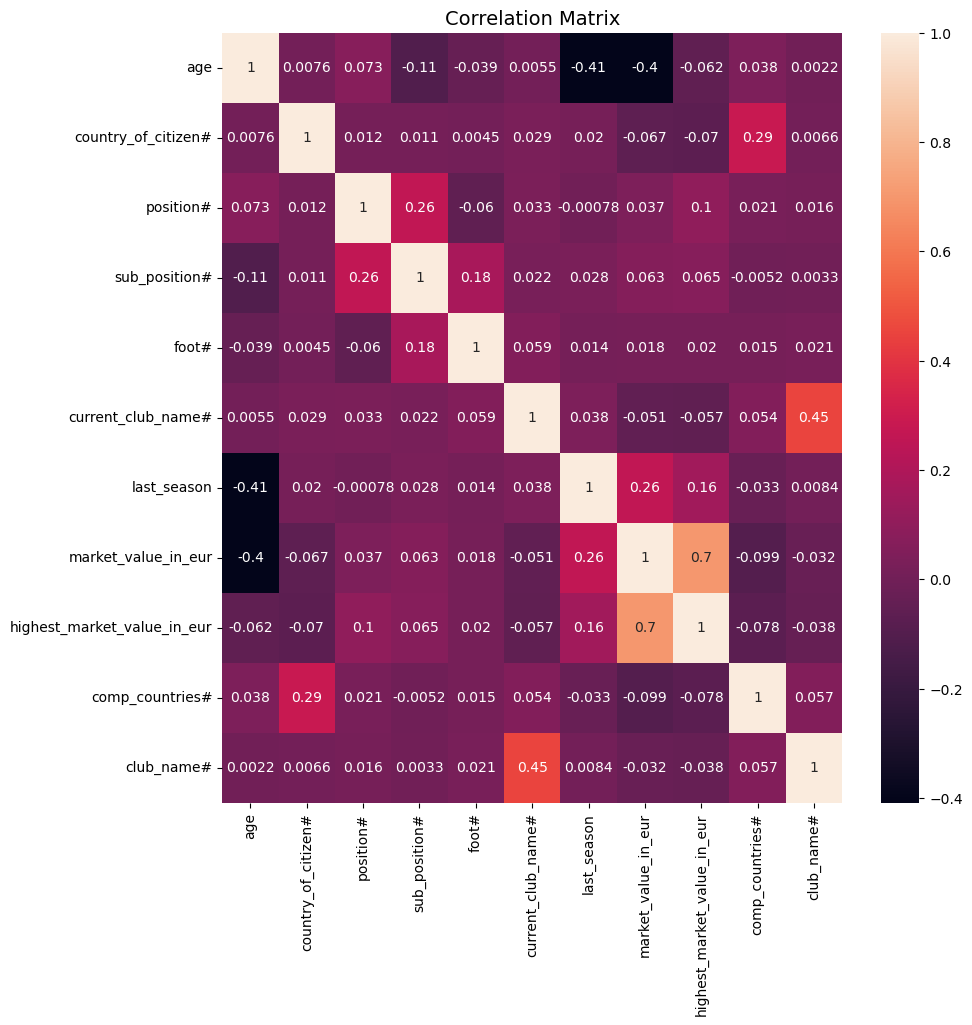

In [41]:
# Create the correlation heatmap.
f,ax = plt.subplots(figsize=(10,10))

corr = sns.heatmap(numeric_data.corr(), annot = True, ax = ax)  

plt.title('Correlation Matrix', fontsize=14)

Interpreting the correlations from the heatmap:

All, except 'market_value_in_eur', highest_market_value_in_eur and 'age', values are numerical placeholders for categorical data. Correlation heatmap can't be used to effectively determine correlation between these variables.

'age'has a weak negative correlation market_value_in_eur (-0.4), and highest_market_value_in_eur (-0.06).



#### Scatterplots:

C:\Users\Utilizador\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


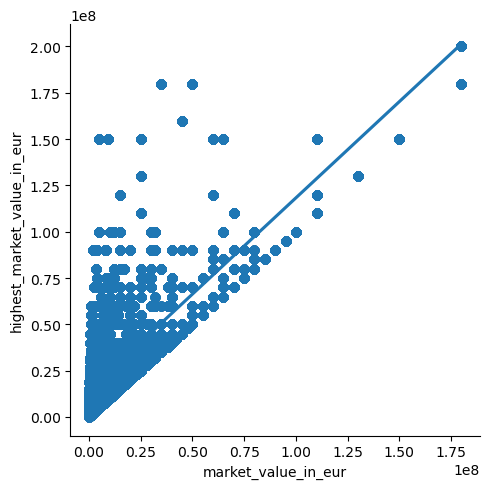

In [42]:
# Create a scatterplot for the market_value_in_eur and highest_market_value_in_eur
sns.lmplot(x = 'market_value_in_eur', y = 'highest_market_value_in_eur', data = big5leagues)

As expected 'market_value_in_eur' (current market value) and 'highest_market_value_in_eur' have a positive correlation.

'highest_market_value_in_eur' is the highest market value held by the player in their career, this value will never decrease. Market value is constantly fluctuating which is why it won't be a perfect correlation.

'market_value_in_eur' will affect a change in highest_market_value_in_eur when its value is greater but never when it is equal or less.

'highest_market_value_in_eur' has no affect on market_value_in_eur.

C:\Users\Utilizador\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


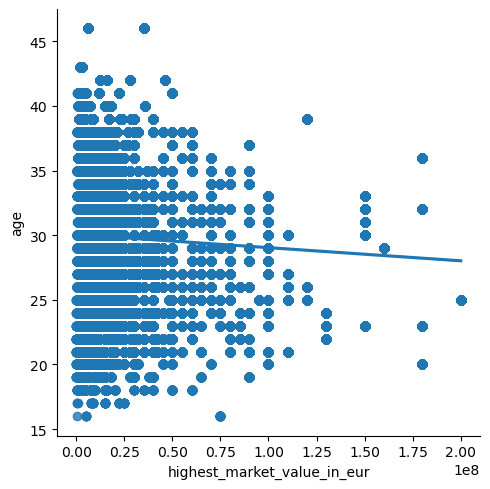

In [43]:
# Create a scatterplot for the market_value_in_eur and age
sns.lmplot(x = 'highest_market_value_in_eur', y = 'age', data = big5leagues)

Age has very little influence on the highest_market_value_in_eur.

C:\Users\Utilizador\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


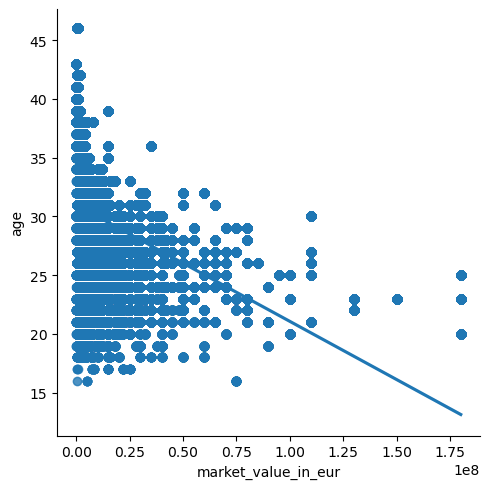

In [44]:
# Create a scatterplot for the market_value_in_eur and age
sns.lmplot(x = 'market_value_in_eur', y = 'age', data = big5leagues)

Shows a negative relationship between age and market value. A player´s market value decreases at a slow rate as the player gets older.

#### Pair Plot:


C:\Users\Utilizador\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Utilizador\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Utilizador\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Utilizador\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


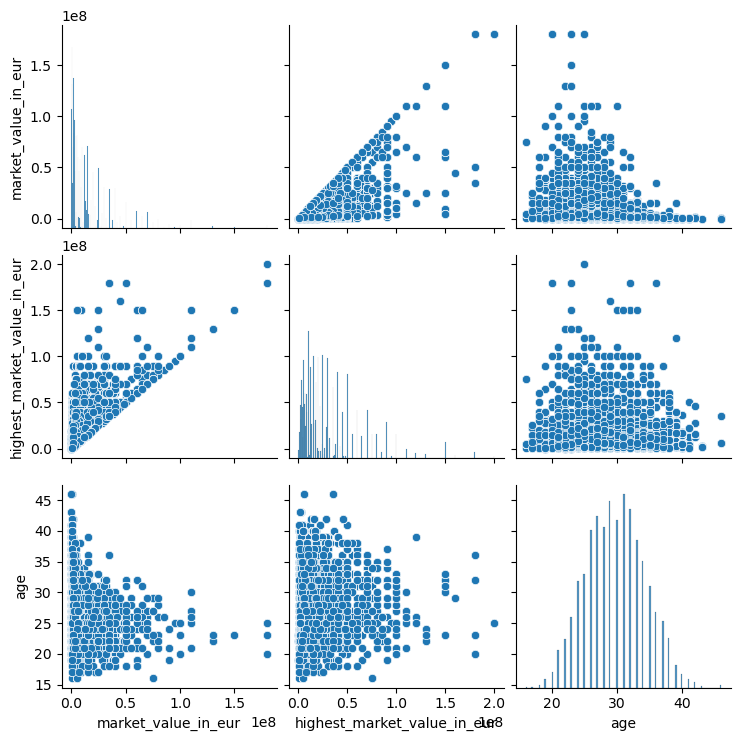

In [45]:
pair_plot_vars = big5leagues[['market_value_in_eur', 'highest_market_value_in_eur', 'age']]
pair_plot = sns.pairplot(pair_plot_vars)

market_value_in_eur has a right skewed distribution indicating that most players in the big5 leagues fall into a below average market value. 
highest_market_value_in_eur also has a right skewed distribution indicating that most players in the big5 leagues have below average highest_market_value_in_eur.
ages have a normal distribution with most players within the big5 leagues are currently between the ages of 26 and 32.

#### Catagorical Plots:

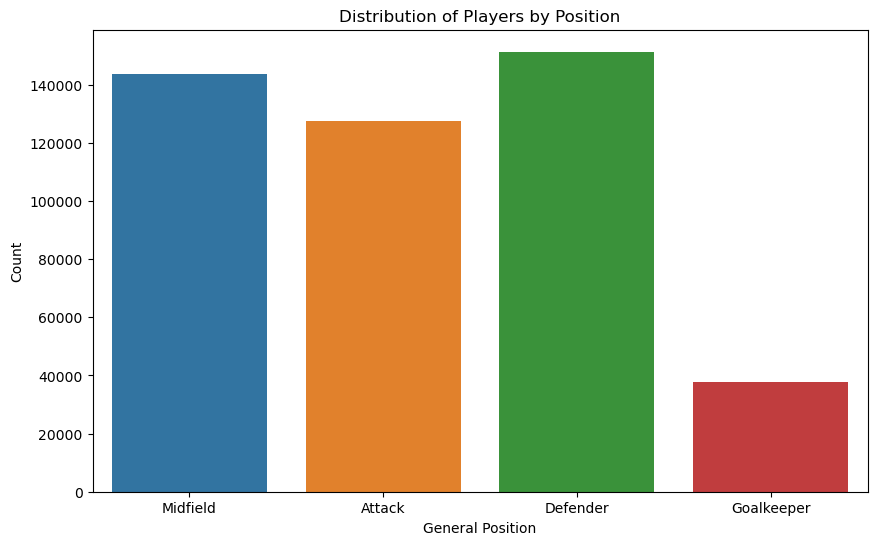

In [46]:
#Bar plot for position
plt.figure(figsize=(10, 6))
sns.countplot(x='position', data=big5leagues)
plt.title('Distribution of Players by Position')
plt.xlabel('General Position')
plt.ylabel('Count')
plt.show()

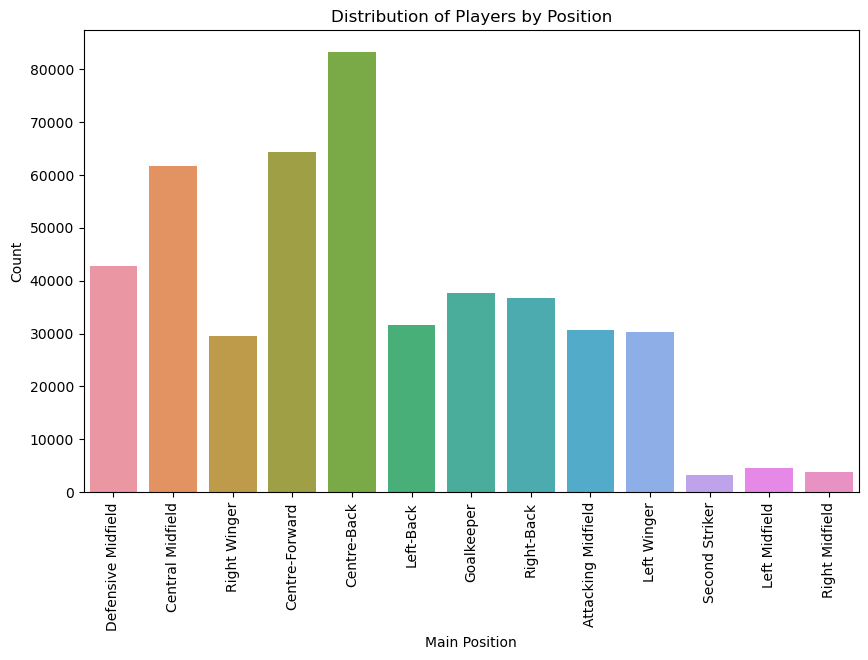

In [47]:
#Bar plot for sub_position
plt.figure(figsize=(10, 6))
sns.countplot(x='sub_position', data=big5leagues)
plt.title('Distribution of Players by Position')
plt.xlabel('Main Position')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

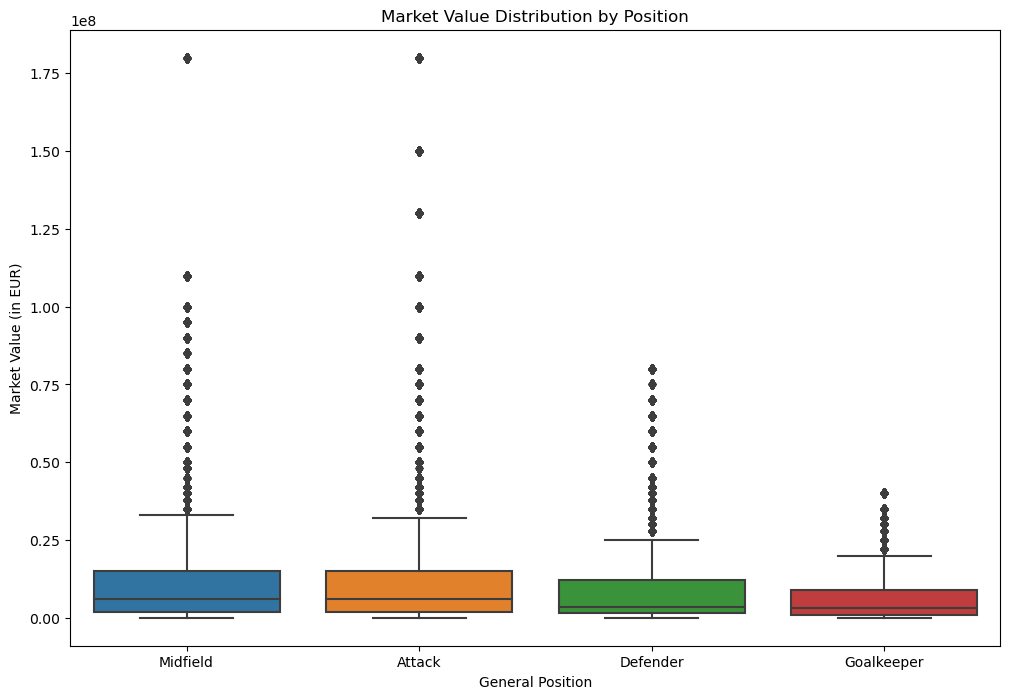

In [48]:
#Box plot for market_value_in_eur by position
plt.figure(figsize=(12, 8))
sns.boxplot(x='position', y='market_value_in_eur', data=big5leagues)
plt.title('Market Value Distribution by Position')
plt.xlabel('General Position')
plt.ylabel('Market Value (in EUR)')
plt.show()

Attack position and Midfield position seem to be the two positions that are valued higher. there max values and means are higher than Defender and Goalkeeper

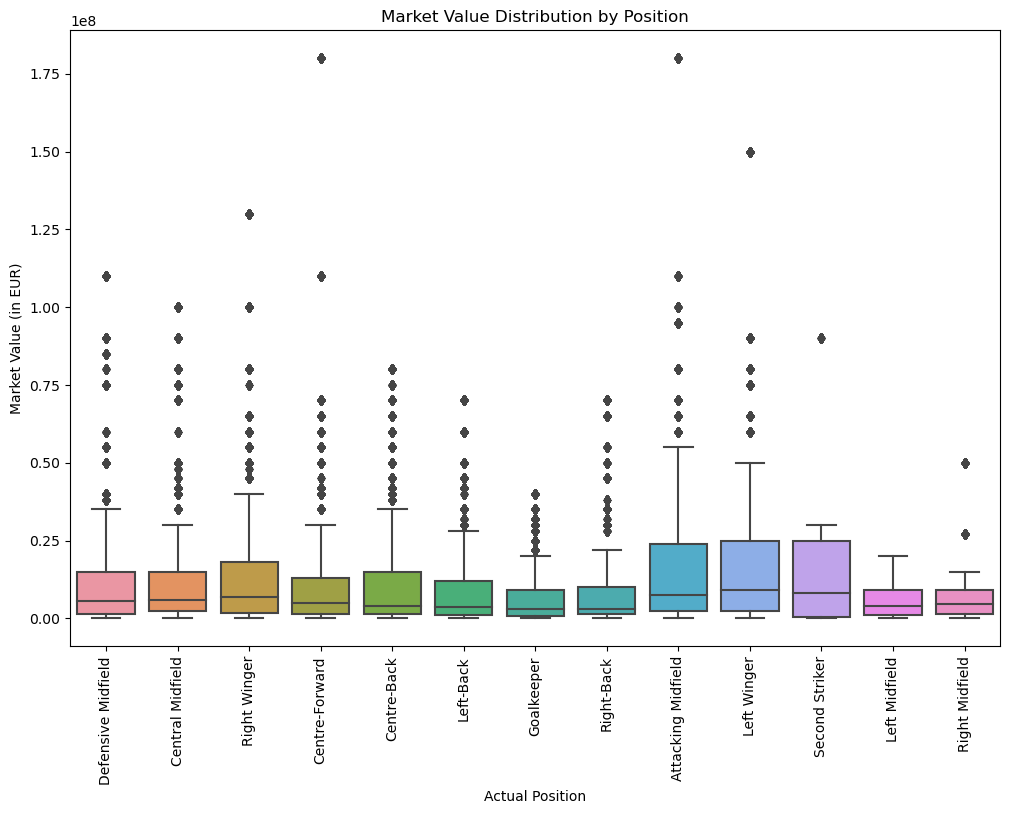

In [49]:
#Box plot for market_value_in_eur by sub_position
plt.figure(figsize=(12, 8))
sns.boxplot(x='sub_position', y='market_value_in_eur', data=big5leagues)
plt.title('Market Value Distribution by Position')
plt.xlabel('Actual Position')
plt.ylabel('Market Value (in EUR)')
plt.xticks(rotation=90)
plt.show()

The actual postions that hold most value are Attacking Midfield, Left winger, Right Winger. Goalkeeper, Right-back and left-back are lower valued on average.

C:\Users\Utilizador\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Utilizador\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Utilizador\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


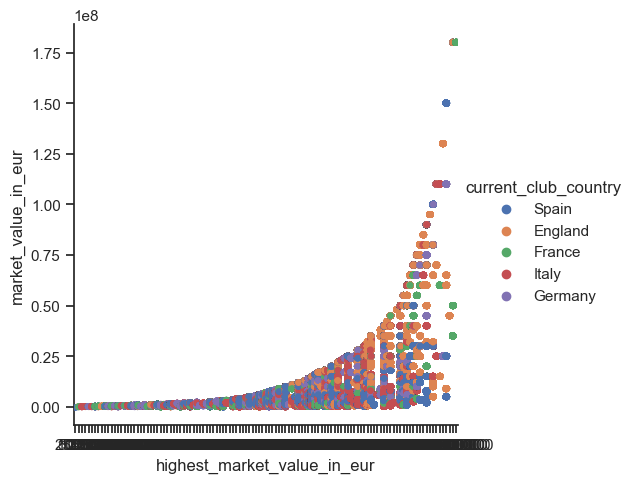

In [50]:
sns.set(style="ticks")
a= sns.catplot(x='highest_market_value_in_eur', y='market_value_in_eur', hue='current_club_country', data=big5leagues)

It is difficult to read the graph, but England dominates the most right part of the graph indicating that it holds the highest market value share

In [51]:
#lets focus on players valued more than 30mil
high_value_players = big5leagues[big5leagues['market_value_in_eur'] >= 30000000]

C:\Users\Utilizador\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Utilizador\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Utilizador\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


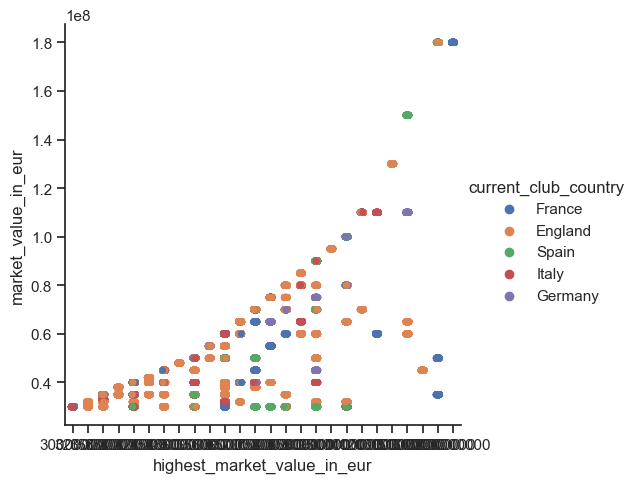

In [52]:
sns.set(style="ticks")
a= sns.catplot(x='highest_market_value_in_eur', y='market_value_in_eur', hue='current_club_country', data=high_value_players)

England, France and Spain hold the top three highest valued players. Looking at this graph England seems to hold the highest market value of all leagues.

#### Export Data

In [53]:
#export big5leagues
big5leagues.to_pickle(os.path.join(path, '02 Data','Prepared Data','big5leagues.pkl'))